# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2383 Борисов Иван Павлович, Иваницкий Илья Александрович. Вариант №9.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Частота дискретизации:

$ f_d = \frac{1}{T} $

Единичный цифровой импульс:

$ \delta_d(k) =
\begin{cases}
1, & k = 0, \\
0, & k \neq 0,
\end{cases}
\quad k \in \mathbb{Z} $

Дельта-функция (функция Дирака):

$ \delta(t) =
\begin{cases}
\infty, & t = 0, \\
0, & t \neq 0.
\end{cases} $

Дискретный единичный скачок:

$ \sigma_d(k) =
\begin{cases}
1, & k \geq 0, \\
0, & k < 0,
\end{cases}
\quad k \in \mathbb{Z} $

Функция единичного скачка (функция Хевисайда):

$ \sigma(t) =
\begin{cases}
1, & t > 0, \\
0.5 \ или \ не \ определена, & t = 0, \\
0, & t < 0.
\end{cases} $

Дискретная экспоненциальная функция:

$ s_1(k) =
\begin{cases}
0, & k < 0, \\
a^k, & k \geq 0,
\end{cases}
\quad k \in \mathbb{Z} $

Дискретный комплексный гармонический сигнал:

$ s_2(k) = C \exp\!\big(j \omega_0 k \big) $


## Постановка задачи

Используя соответствующее программное обеспечение, выполнить моделирование и исследование характеристик базовых дискретных последовательностей. Полученные результаты должны быть проиллюстрированы.

## Выполнение работы

In [1]:
%matplotlib inline
import numpy as np

# Номер бригады
N_br = 9

# Количество отсчетов
N = 30 + (N_br % 5)  
# Период дискретизации (шаг времени между отсчетами)
T = 0.0005 * (1 + (N_br % 3))  
# Параметр экспоненты
a = (-1)**N_br * (0.8 + 0.005 * (N_br % 20))  
# Амплитуда гармонического сигнала
C = 1 + (N_br % 5)  
# Угловая частота гармонического сигнала
w0 = np.pi / (6 + (N_br % 5))  
# Задержка в отсчетах
m = 5 + (N_br % 5)  

# Вектор индексов дискретного времени
n = np.arange(N)  
# Вектор реального времени (t = n*T)
t = n * T  

## Задание 1

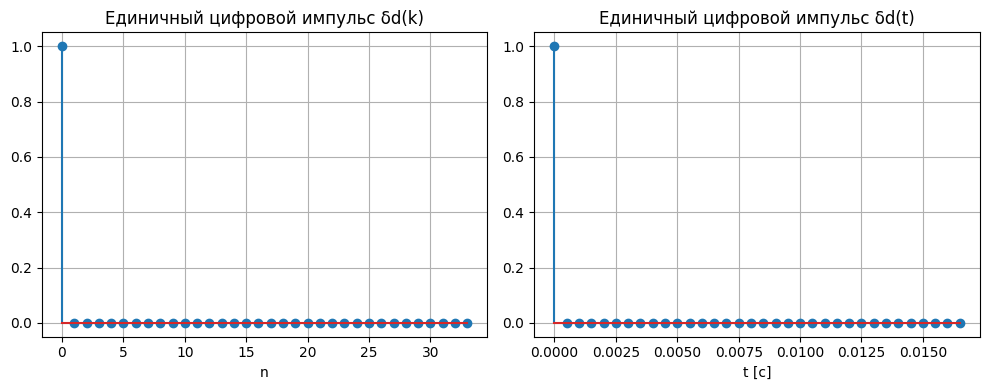

In [3]:
import matplotlib.pyplot as plt

# δ[k] - дискретная единичная последовательность
# δ[0] = 1, остальные элементы = 0
# Это фундаментальная последовательность для анализа линейных дискретных систем
delta = np.zeros(N)
delta[0] = 1

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.stem(n, delta,)
plt.title("Единичный цифровой импульс δd(k)")
plt.xlabel("n")
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(t, delta,)
plt.title("Единичный цифровой импульс δd(t)")
plt.xlabel("t [с]")
plt.grid(True)

plt.tight_layout()
plt.show()

# - δ[k] = 1 при k=0, δ[k] = 0 при k≠0
# - Используется для построения отклика дискретной системы
# - Отображение по времени t = n*T позволяет увидеть реальные интервалы дискретизации


## Взаимосвязь дискретного и нормированного времени:
Дискретное нормированное время $n$ представляет безразмерный индекс отсчета, тогда как дискретное время $t = nT$, где $T$ - период дискретизации. Форма сигналов идентична при различном масштабе временной оси.

## Различие между $\delta_d(k)$ и $\delta(t)$:

Единичный цифровой импульс:
$ \delta_d(k) =
\begin{cases}
1, & k = 0, \
0, & k \neq 0,
\end{cases}
\quad k \in \mathbb{Z} $

является дискретным сигналом с конечной амплитудой, тогда как дельта-функция Дирака:
$ \delta(t) =
\begin{cases}
\infty, & t = 0, 
0, & t \neq 0.
\end{cases} $ представляет математическую абстракцию для непрерывных сигналов.

## Задание 2

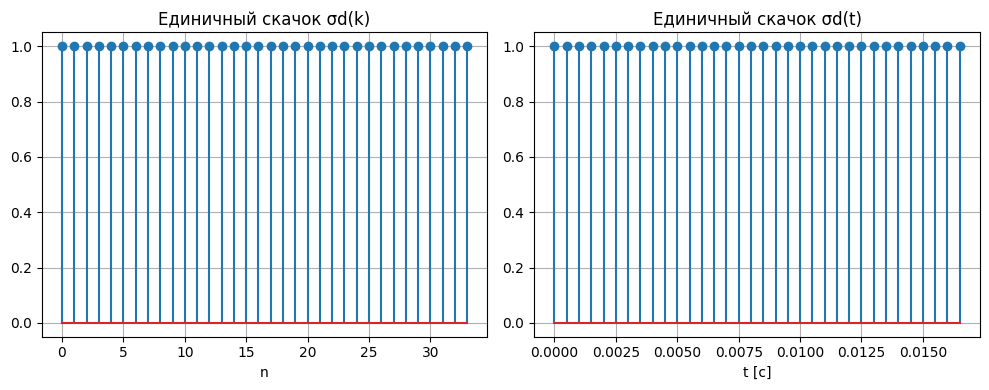

In [4]:
# σ[k] - единичная ступенчатая последовательность
# σ[k] = 1 для всех k >= 0
# Используется для анализа интегрирующих систем и накопительных процессов
sigma = np.ones(N)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.stem(n, sigma,)
plt.title("Единичный скачок σd(k)")
plt.xlabel("n")
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(t, sigma,)
plt.title("Единичный скачок σd(t)")
plt.xlabel("t [с]")
plt.grid(True)

plt.tight_layout()
plt.show()

# - σ[k] часто используется для анализа дискретных интеграторов
# - В отличие от δ[k], скачок сохраняется на всех последующих отсчетах
# - График по t показывает "физическую" временную ось


Соответствие дискретного и аналогового скачков:

Дискретный единичный скачок:
$ \sigma_d(k) 
\begin{cases}
1, & k \geq 0, \\
0, & k < 0,
\end{cases}
\quad k \in \mathbb{Z} $

получается как результат дискретизации аналогового скачка в моменты времени $t = kT$.

Частота дискретизации:

$ f_d = \frac{1}{T} = \frac{1}{0.0005} = 2000\text{ Гц} $

## Задание 3

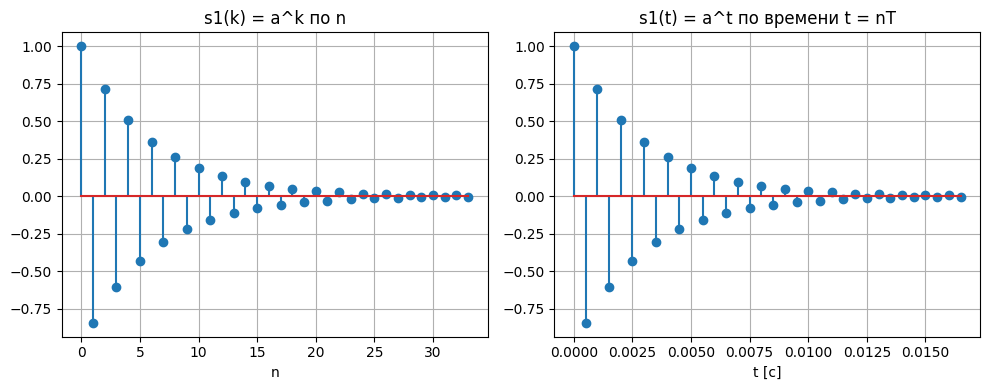

In [5]:
# s1[k] = a^k, где a - константа
# Используется для анализа стабильности и поведения дискретных систем
s1 = a**n

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.stem(n, s1,)
plt.title("s1(k) = a^k по n")
plt.xlabel("n")
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(t, s1,)
plt.title("s1(t) = a^t по времени t = nT")
plt.xlabel("t [с]")
plt.grid(True)

plt.tight_layout()
plt.show()

# - Если |a| < 1, последовательность убывает, система устойчива
# - Если |a| > 1, последовательность растет, система неустойчива
# - Наличие отрицательного a приводит к чередованию знаков (колебательный процесс)


Соответствие дискретной и аналоговой экспонент:

Дискретная экспонента $s_1[k] = a^k$ связана с аналоговой $s(t) = e^{\alpha t}$ соотношением:
$ a = e^{\alpha T} $

При $|a| < 1$ последовательность затухает, при $|a| > 1$ - возрастает, при $a < 0$ наблюдается знакопеременность.

## Задание 4

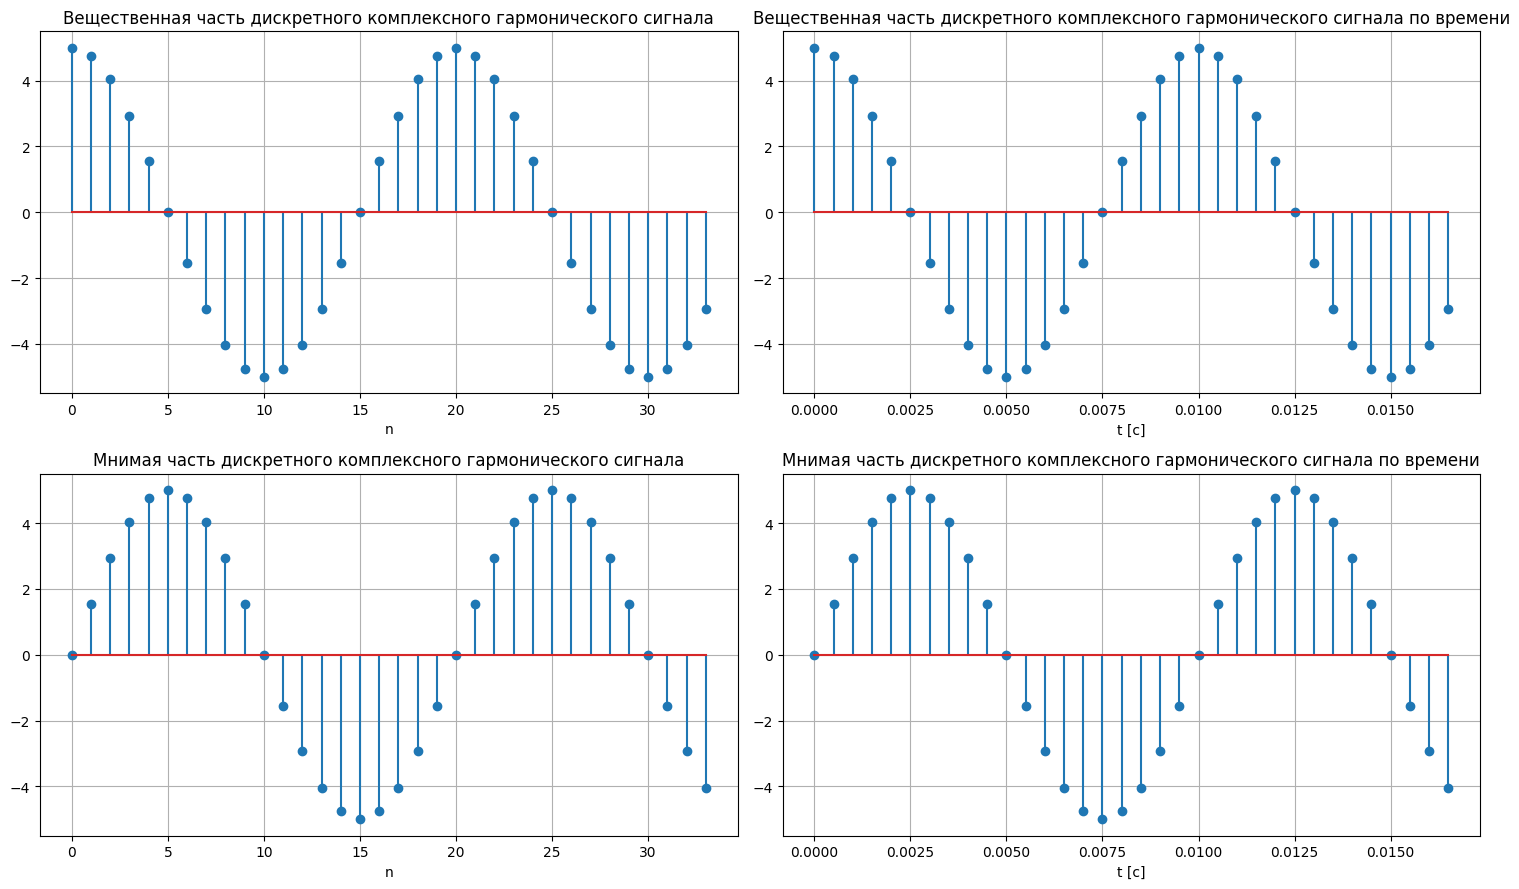

In [18]:
# s2[k] = C * exp(j*w0*k)
# Re{s2} = C*cos(w0*k), Im{s2} = C*sin(w0*k)
# Используется для анализа частотных характеристик и гармонических сигналов
s2 = C * np.exp(1j * w0 * n)
s2_real = np.real(s2)
s2_imag = np.imag(s2)

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.stem(n, s2_real,)
plt.title("Вещественная часть дискретного комплексного гармонического сигнала")
plt.xlabel("n")
plt.grid(True)

plt.subplot(2,2,2)
plt.stem(t, s2_real,)
plt.title("Вещественная часть дискретного комплексного гармонического сигнала по времени")
plt.xlabel("t [с]")
plt.grid(True)

plt.subplot(2,2,3)
plt.stem(n, s2_imag,)
plt.title("Мнимая часть дискретного комплексного гармонического сигнала")
plt.xlabel("n")
plt.grid(True)

plt.subplot(2,2,4)
plt.stem(t, s2_imag,)
plt.title("Мнимая часть дискретного комплексного гармонического сигнала по времени")
plt.xlabel("t [с]")
plt.grid(True)

plt.tight_layout()
plt.show()

# - Комплексная экспонента используется для анализа сигналов в частотной области
# - Re и Im сигнала показывают косинусную и синусную составляющие
# - Графики по t позволяют увидеть реальный период и фазу сигнала

Представление через вещественные последовательности:

$ s_2[k] = C \exp(j\omega_0 k) = C \cos(\omega_0 k) + j C \sin(\omega_0 k) $

где вещественная часть: $C \cos(\omega_0 k)$, мнимая часть: $C \sin(\omega_0 k)$.

## Задание 5

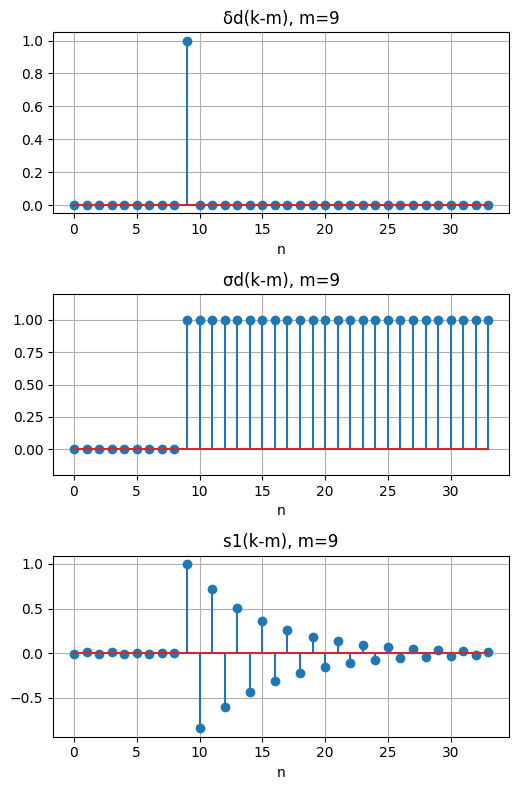

In [11]:
# Сдвиг последовательности на m отсчетов
delta_delayed = np.roll(delta, m)
sigma = np.zeros_like(n, dtype=float)
sigma[n >= 0] = 1  
sigma_delayed = np.zeros_like(sigma)
sigma_delayed[m:] = sigma[:-m]
s1_delayed = np.roll(s1, m)

plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
plt.stem(n, delta_delayed,)
plt.title(f"δd(k-m), m={m}")
plt.xlabel("n")
plt.grid(True)

plt.subplot(3,2,3)
plt.stem(n, sigma_delayed)
plt.ylim(-0.2, 1.2)
plt.title(f"σd(k-m), m={m}")
plt.xlabel("n")
plt.grid(True)

plt.subplot(3,2,5)
plt.stem(n, s1_delayed,)
plt.title(f"s1(k-m), m={m}")
plt.xlabel("n")
plt.grid(True)

plt.tight_layout()
plt.show()

# - Задержка на m отсчетов сдвигает сигнал по оси времени
# - В линейных дискретных системах задержка реализуется через оператор z^-m
# - Задержанные графики позволяют визуально оценить фазовые сдвиги и временные задержкин

Формулы задержанных последовательностей:

Задержанный единичный импульс: $\delta(k - m) = \begin{cases}
1, & k = m \\
0, & k \neq m
\end{cases}$

Задержанный единичный скачок: $\sigma(k - m) = \begin{cases}
1, & k \geq m \\
0, & k < m
\end{cases}$

Задержанная экспоненциальная функция: $s_1(k - m) = \begin{cases}
0, & k < m \\
a^{k-m}, & k \geq m
\end{cases}$

Задержка на $m$ отсчетов реализует сдвиг последовательности вправо по оси $n$. При использовании функции np.roll осуществляется циклический сдвиг, однако в реальных системах задержка обычно реализуется с дополнением нулями слева.

## Выводы

В ходе выполнения лабораторной работы были смоделированы основные дискретные последовательности: единичный цифровой импульс δ[k], единичный скачок σ[k], экспоненциальная последовательность s1[k] = a^k и комплексный гармонический сигнал s2[k] = C·exp(j·ω₀·k).
Были построены графики этих сигналов как по дискретным индексам n, так и по физическому времени t = n·T, что позволило показать различие между дискретным и нормированным временем.
Комплексный гармонический сигнал был представлен через две вещественные последовательности - косинусную (Re{s2[k]}) и синусную (Im{s2[k]}), что демонстрирует его разложение на вещественные компоненты.
Для единичного импульса, единичного скачка и экспоненциальной последовательности были смоделированы задержки на m отсчетов, и построены соответствующие графики, иллюстрирующие сдвиг сигналов во времени.